In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
trainsData= pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')

In [4]:
trainsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

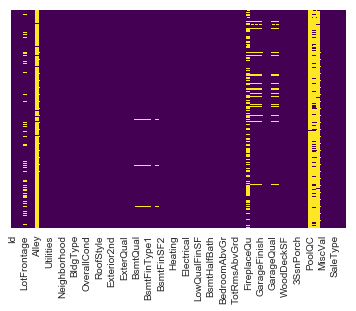

In [5]:
#cbar false means no color bar and yticklabels false means no y label and check null value in yellow if present
sns.heatmap(trainsData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, 'Number of houses')

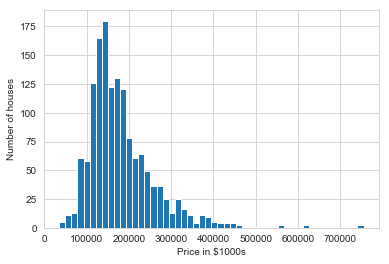

In [6]:
# Histogram of prices (this is the target of our dataset)
plt.hist(trainsData['SalePrice'],bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

/Users/pallab/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/pallab/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


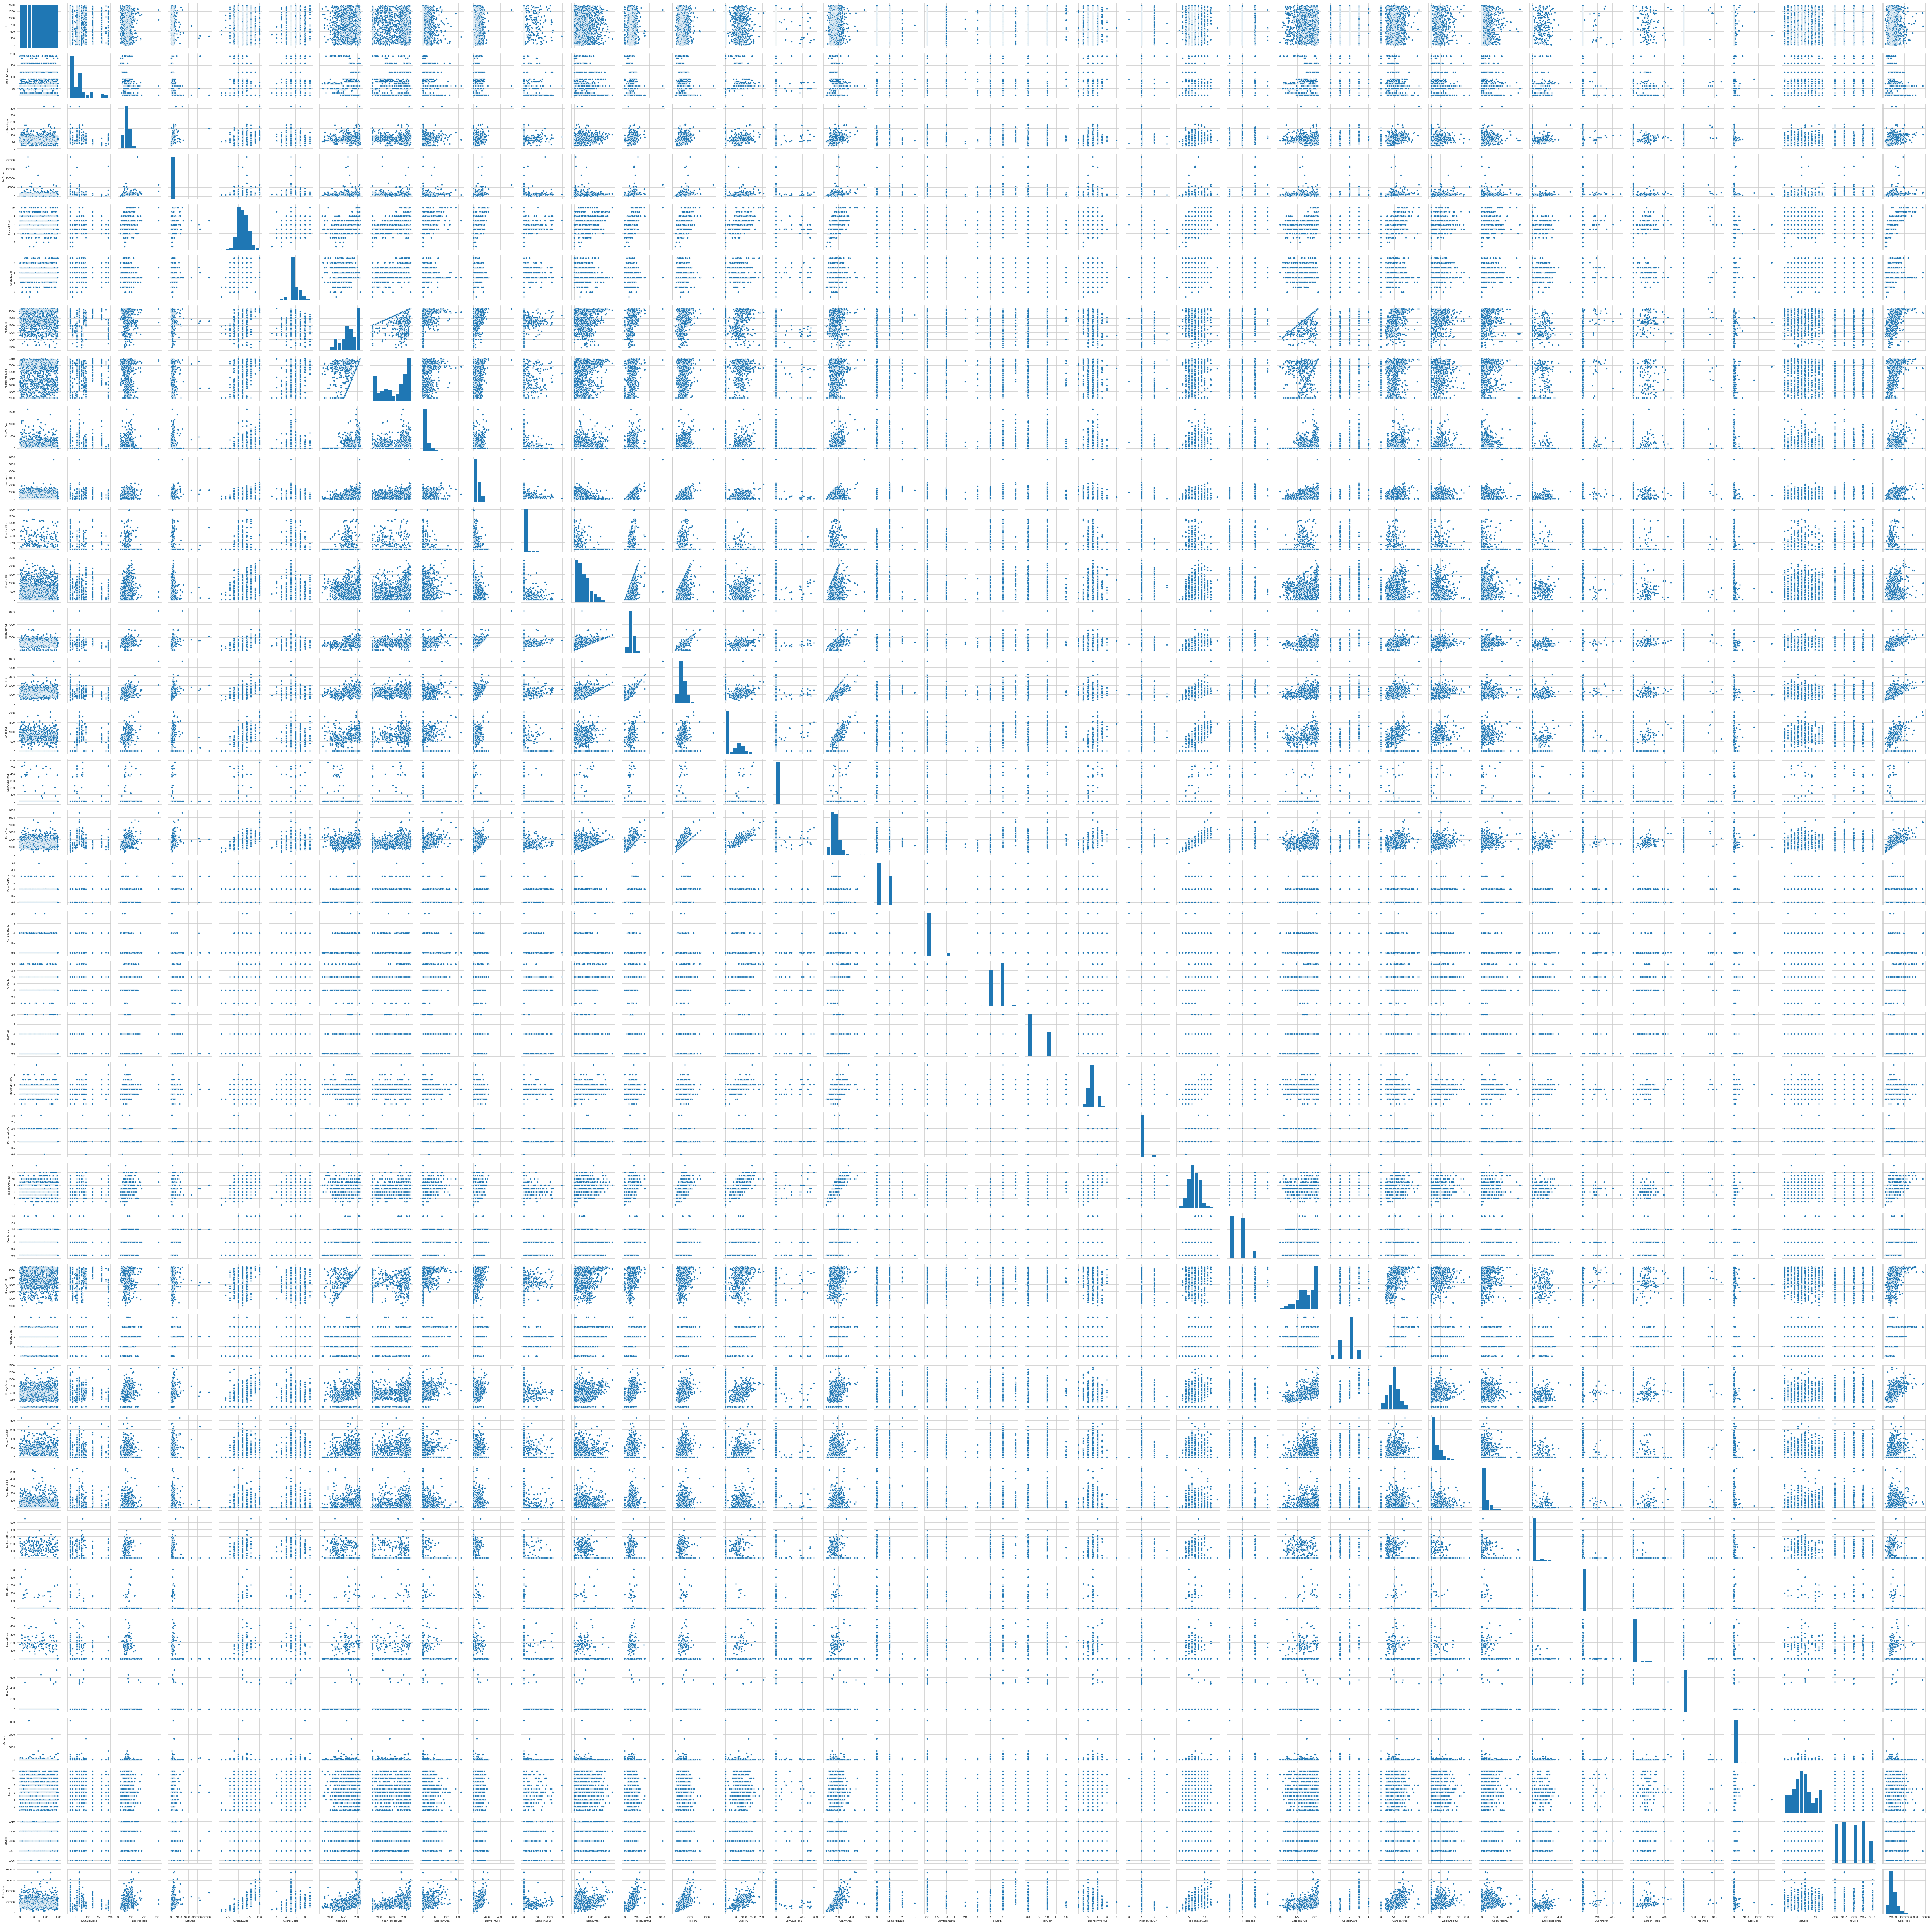

In [7]:
sns.pairplot(trainsData,palette='Set1')

In [8]:
trainsData.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [9]:
trainsData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
trainsData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
trainsData['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [31]:
trainsData['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [32]:
def convertCatToNum(df):
    cat_map_dict={}
    for cat in list(df.select_dtypes(include=['category', object]).columns):
        catUnq=trainsData[cat].unique()
        cat_map_dict[cat]={d:i for i,d in enumerate(catUnq)}
    return cat_map_dict

In [27]:
convertCatToNum(trainsData)

{'MSZoning': {'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4},
 'Street': {'Pave': 0, 'Grvl': 1},
 'Alley': {nan: 0, 'Grvl': 1, 'Pave': 2},
 'LotShape': {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3},
 'LandContour': {'Lvl': 0, 'Bnk': 1, 'Low': 2, 'HLS': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'CulDSac': 3, 'FR3': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'CollgCr': 0,
  'Veenker': 1,
  'Crawfor': 2,
  'NoRidge': 3,
  'Mitchel': 4,
  'Somerst': 5,
  'NWAmes': 6,
  'OldTown': 7,
  'BrkSide': 8,
  'Sawyer': 9,
  'NridgHt': 10,
  'NAmes': 11,
  'SawyerW': 12,
  'IDOTRR': 13,
  'MeadowV': 14,
  'Edwards': 15,
  'Timber': 16,
  'Gilbert': 17,
  'StoneBr': 18,
  'ClearCr': 19,
  'NPkVill': 20,
  'Blmngtn': 21,
  'BrDale': 22,
  'SWISU': 23,
  'Blueste': 24},
 'Condition1': {'Norm': 0,
  'Feedr': 1,
  'PosN': 2,
  'Artery': 3,
  'RRAe': 4,
  'RRNn': 5,
  'RRAn': 6,
  'PosA': 7,
  'RRNe': 8},
 'Condition2': {'Norm':

In [43]:
zeroCol=['ScreenPorch','OpenPorchSF','EnclosedPorch','3SsnPorch','BsmtFinSF1','LowQualFinSF','MiscVal']
for checkZeros in trainsData.select_dtypes(exclude=['category', object]).columns:
    print(checkZeros,trainsData[checkZeros][trainsData[checkZeros]==0.0].value_counts()/len(trainsData))

Id Series([], Name: Id, dtype: float64)
MSSubClass Series([], Name: MSSubClass, dtype: float64)
LotFrontage Series([], Name: LotFrontage, dtype: float64)
LotArea Series([], Name: LotArea, dtype: float64)
OverallQual Series([], Name: OverallQual, dtype: float64)
OverallCond Series([], Name: OverallCond, dtype: float64)
YearBuilt Series([], Name: YearBuilt, dtype: float64)
YearRemodAdd Series([], Name: YearRemodAdd, dtype: float64)
MasVnrArea 0.0    0.589726
Name: MasVnrArea, dtype: float64
BsmtFinSF1 0    0.319863
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2 0    0.885616
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF 0    0.080822
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF 0    0.025342
Name: TotalBsmtSF, dtype: float64
1stFlrSF Series([], Name: 1stFlrSF, dtype: float64)
2ndFlrSF 0    0.567808
Name: 2ndFlrSF, dtype: float64
LowQualFinSF 0    0.982192
Name: LowQualFinSF, dtype: float64
GrLivArea Series([], Name: GrLivArea, dtype: float64)
BsmtFullBath 0    0.586301
Name: BsmtFullBath, dtype